### Разбиение фрески на фрагменты с помощью наложения маски

In [35]:
import cv2
import numpy as np
import os
from common_functions import show

In [36]:
def extract_and_save_contours(image_path, output_dir, original_image_path, erosion_kernel, erosion_iterations):
    # Загружаем изображение в градациях серого
    binary_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
    original_image = cv2.imread(original_image_path, cv2.IMREAD_COLOR)

    if binary_image is None or original_image is None:
        raise ValueError("Не удалось загрузить изображение.")

    if binary_image.shape[0] != original_image.shape[0] or binary_image.shape[1] != original_image.shape[1]:
        print(binary_image.shape, original_image.shape)
        raise ValueError("Размеры изображений не совпадают")
    
    kernel = np.ones(erosion_kernel, np.uint8)  # Ядро для эрозии
    binary_image = cv2.erode(binary_image, kernel, iterations=erosion_iterations)

    top, bottom, left, right = 50, 50, 50, 50  # Толщина рамки (в пикселях) со всех сторон
    border_color = 0
    binary_image = cv2.copyMakeBorder(
        binary_image,
        top,
        bottom,
        left,
        right,
        borderType=cv2.BORDER_CONSTANT,
        value=border_color
    )

    original_image = cv2.copyMakeBorder(
        original_image,
        top,
        bottom,
        left,
        right,
        borderType=cv2.BORDER_CONSTANT,
        value=border_color
    )


    # Создаем директорию для сохранения выходных изображений
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Находим границы с использованием Canny 
    edges = cv2.Canny(binary_image, 0, 255)
    show(edges)

    # Находим контуры
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Перебираем найденные контуры
    fragment_count = 0
    for contour in contours:
        # Фильтруем контуры по площади
        area = cv2.contourArea(contour)
        if area < 50:  # Игнорируем слишком маленькие контуры
            continue

        # Создаем маску с текущим контуром
        mask = np.ones_like(binary_image, dtype=np.uint8) * 255
        cv2.drawContours(mask, [contour], -1, (0,), thickness=cv2.FILLED)
        mask = cv2.bitwise_not(mask)
        #show(mask)

        # Исходные
        # Применяем маску к исходному изображению
        fragment = cv2.bitwise_and(original_image, original_image, mask=mask)

        # Сохраняем результат
        output_path = os.path.join(output_dir, f"fragment_{fragment_count + 1}.png")
        cv2.imwrite(output_path, fragment)
        #show(fragment)


        # # Экстраполированные
        # mask = cv2.dilate(mask.copy(), None, iterations=50)
        # fragment = cv2.bitwise_and(original_image, original_image, mask=mask)

        # # Сохраняем результат
        # output_path = os.path.join(output_dir, f"fragment_{fragment_count + 1}_.png")
        # cv2.imwrite(output_path, fragment)


        fragment_count += 1

    print(f"Обработка завершена. Сохранено {fragment_count} фрагментов в папке: {output_dir}")

Пример использования

In [37]:
# input_image_path = "pics/split_masks/mask2.jpg"  # Укажите путь к бинарному изображению
# output_directory = "pics/split_results/mask2_1"  # Укажите папку для сохранения фрагментов
# original_image_path = "pics/fr (1).jpg"  # Укажите путь к исходному изображению

### test1

Обработка завершена. Сохранено 5 фрагментов в папке: pics/test1/split_results/
Обработка завершена. Сохранено 6 фрагментов в папке: pics/test1/split_results2/


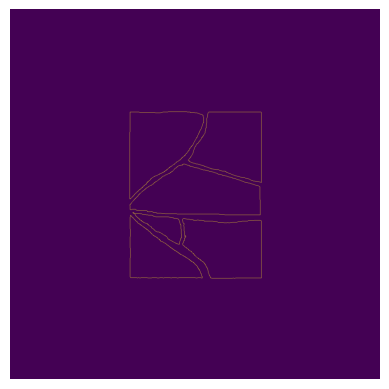

In [38]:
input_image_path = "pics/test1/mask_prepared.png"  # Укажите путь к бинарному изображению
original_image_path = "pics/test1/bordered.png"  # Укажите путь к исходному изображению

erosion_kernel = (4, 4)
erosion_iterations = 1
output_directory = "pics/test1/split_results/"  # Укажите папку для сохранения фрагментов

extract_and_save_contours(input_image_path, output_directory, original_image_path, erosion_kernel, erosion_iterations)

erosion_kernel = (5, 5)
erosion_iterations = 1
output_directory = "pics/test1/split_results2/"  # Укажите папку для сохранения фрагментов

extract_and_save_contours(input_image_path, output_directory, original_image_path, erosion_kernel, erosion_iterations)

### test2

Обработка завершена. Сохранено 5 фрагментов в папке: pics/test2/split_results/
Обработка завершена. Сохранено 5 фрагментов в папке: pics/test2/split_results2/


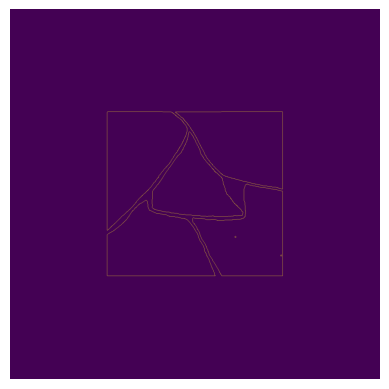

In [39]:
input_image_path = "pics/test2/mask_prepared.png"  # Укажите путь к бинарному изображению
original_image_path = "pics/test2/bordered.png"  # Укажите путь к исходному изображению

erosion_kernel = (6, 6)
erosion_iterations = 1
output_directory = "pics/test2/split_results/"  # Укажите папку для сохранения фрагментов
extract_and_save_contours(input_image_path, output_directory, original_image_path, erosion_kernel, erosion_iterations)

erosion_kernel = (5, 5)
erosion_iterations = 1
output_directory = "pics/test2/split_results2/"  # Укажите папку для сохранения фрагментов
extract_and_save_contours(input_image_path, output_directory, original_image_path, erosion_kernel, erosion_iterations)